# Handwritten-Digit Classifications

In this exercise, we are using **MNIST Data Set**. This data has items of handwriting the digits 0 troughs 9 and contain:
* 42K image
* 10 Categories
* Each image are 28x28
* Each pixel-value is an integer between 0 and 255
Using numbers for labeling each image
Can train a neural net!

## Load training and testing data

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

# Plot data images

4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0 

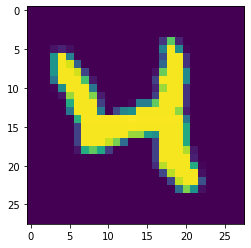

In [4]:
import matplotlib.pyplot as plt

plt.imshow(training_images[20])
print(training_labels[20])
print(training_images[20])

## Normalazing

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## Making model

In [6]:
model  = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


## Compiling

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Callbacks

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

## Training

In [9]:
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3430 - accuracy: 0.9011
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0840 - accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0250 - accuracy: 0.9920

Reached 99% accuracy so cancelling training!


## Testing

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9793


[0.07238056510686874, 0.9793000221252441]

## Clasifications

[1.4158501e-11 9.9986959e-01 1.7962232e-09 3.9810055e-10 5.3280796e-06
 4.8530083e-11 4.2261254e-11 1.2457314e-04 4.8132733e-07 1.0676269e-08]
1


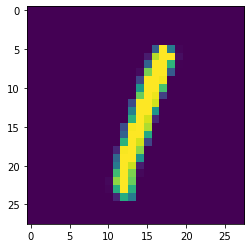

In [11]:
classifications = model.predict(test_images)
print(classifications[5])
print(test_labels[5])
plt.imshow(test_images[5])

[2.0379372e-05 2.4261968e-09 6.4128542e-08 4.8701633e-08 4.6186736e-07
 9.5734595e-06 9.9996352e-01 7.5326438e-09 5.8735868e-06 9.3704866e-09]


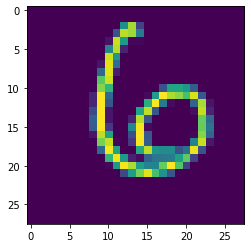

In [13]:
print(classifications[100])
plt.imshow(test_images[100])